In [1]:
# Install PyTorch, TorchVision and matplotlib
!pip install torch==1.5.0+cpu torchvision -f https://download.pytorch.org/whl/torch_stable.html
!pip install matplotlib

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 6.5MB 1.7MB/s eta 0:00:01


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F

## Build a Neural Network

### Build Your Own Neural Network

#### Load data

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])
train_set = torchvision.datasets.MNIST('.', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True, num_workers=4)
test_set = torchvision.datasets.MNIST('.', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=4, shuffle=False, num_workers=4)


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Display data

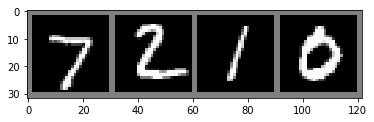

Labels: tensor([7, 2, 1, 0])


In [4]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

images, labels = next(iter(test_loader))  # First group of test examples
imshow(torchvision.utils.make_grid(images))
print('Labels:', labels)

### Create the Net

In [5]:
class MyConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 2, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(2, 6, 5)
        self.fc1 = nn.Linear(96, 32)
        self.fc2 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 96)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
net = MyConvNet()

### Train

In [6]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        # backward (differentiate)
        loss.backward()
        # optimize (update)
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 3000 == 2999:    # print every 3000 mini-batches
            print(f'Epoch: {epoch + 1}, Iteration: {i + 1}, loss: {running_loss / 3000}')
            running_loss = 0.0

    # Test accuracy
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)  # The label with the maximum probability is predicted
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the test images: {(100 * correct / total)} %')

Epoch: 1, Iteration: 3000, loss: 0.9212579760189789
Epoch: 1, Iteration: 6000, loss: 0.22827606400537964
Epoch: 1, Iteration: 9000, loss: 0.149876085664775
Epoch: 1, Iteration: 12000, loss: 0.12869957231781426
Epoch: 1, Iteration: 15000, loss: 0.1350821195411613
Accuracy of the network on the test images: 95.63 %
Epoch: 2, Iteration: 3000, loss: 0.10741373933895436
Epoch: 2, Iteration: 6000, loss: 0.10261403205692007
Epoch: 2, Iteration: 9000, loss: 0.10322921551451918
Epoch: 2, Iteration: 12000, loss: 0.09648825815404401
Epoch: 2, Iteration: 15000, loss: 0.10255164598559668
Accuracy of the network on the test images: 96.81 %
Epoch: 3, Iteration: 3000, loss: 0.0825312990617122
Epoch: 3, Iteration: 6000, loss: 0.08366553215320596
Epoch: 3, Iteration: 9000, loss: 0.08450001997421684
Epoch: 3, Iteration: 12000, loss: 0.09115066403990378
Epoch: 3, Iteration: 15000, loss: 0.07939330021057647
Accuracy of the network on the test images: 97.8 %


### Display Sample Test Results

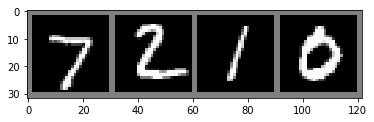

Labels: tensor([7, 2, 1, 0])
Predicted: tensor([7, 2, 1, 0])


In [9]:
images, labels = next(iter(test_loader))  # First group of test examples
imshow(torchvision.utils.make_grid(images))
print('Labels:', labels)
outputs = net(images)
_, predicted = torch.max(outputs.data, 1)  # The label with the maximum probability is predicted
print('Predicted:', predicted)

## Save Model

In [10]:
torch.save(net.state_dict(), 'minst-classifier.pt')